In [1]:
import numpy as np
import h5py
import tables
import matplotlib.pyplot as plt

In [7]:
# load PMT
f = open(r'../PMT_1t.txt')
line = f.readline()
data_list = []
while line:
    num = list(map(float,line.split()))
    data_list.append(num)
    line = f.readline()
f.close()
PMT_pos = np.array(data_list)

# load 2 MeV sim files
filename = '/mnt/stage/douwei/Simulation/1t_root/2.0MeV_015/1t_+0.60.h5'
#filename = path + '1t_' + radius + '.h5'
# read files by table
h1 = tables.open_file(filename,'r')
print(filename)
truthtable = h1.root.GroundTruth
EventID = truthtable[:]['EventID']
ChannelID = truthtable[:]['ChannelID']
h1.close()

# read file series

try:
    for j in np.arange(1,20,1):
        filename = Energy + '/calib' + radius + '_' + str(j)+ '.h5'           
        h1 = tables.open_file(filename,'r')
        print(filename)
        truthtable = h1.root.GroundTruth

        EventID_tmp = truthtable[:]['EventID']
        ChannelID_tmp = truthtable[:]['ChannelID']
        EventID = np.hstack((EventID, EventID_tmp))
        ChannelID = np.hstack((ChannelID, ChannelID_tmp))

        h1.close()
except:
    j = j - 1

# total_pe: PMT num * event num
# each column is a event with 30 PMT
total_pe = np.zeros((np.size(PMT_pos[:,0]),max(EventID)))
for k in np.arange(1, max(EventID)):
    event_pe = np.zeros(np.size(PMT_pos[:,0]))
    hit = ChannelID[EventID == k]
    tabulate = np.bincount(hit)
    event_pe[0:np.size(tabulate)] = tabulate
    total_pe[:,k-1] = event_pe

/mnt/stage/douwei/Simulation/1t_root/2.0MeV_015/1t_+0.60.h5


/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


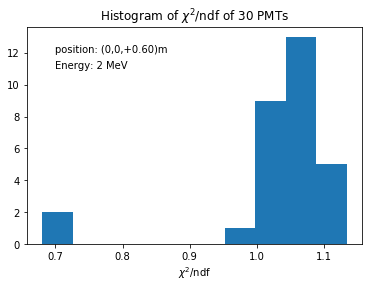

In [8]:
# check chi square
chi = np.zeros(30)
# predict is just the mean of all events
predict = np.zeros(30)
for seq in np.arange(30):
    bin_num = np.int(np.max(total_pe[seq]) - np.min(total_pe[seq]))
    a,b = np.histogram(total_pe[seq],bins=bin_num-1)
    predict[seq] = np.mean(total_pe[seq])
    chi[seq] = 2*np.sum(- total_pe[seq] + predict[seq] + \
                        np.nan_to_num(total_pe[seq]*np.log(total_pe[seq]/predict[seq])))/(np.max(EventID)-30)
plt.hist(chi)
plt.xlabel(s = r'$\chi^2$/ndf')
plt.title(r'Histogram of $\chi^2$/ndf of 30 PMTs')
plt.text(0.7,12,'position: (0,0,+0.60)m')
plt.text(0.7,11,'Energy: 2 MeV')
plt.show()

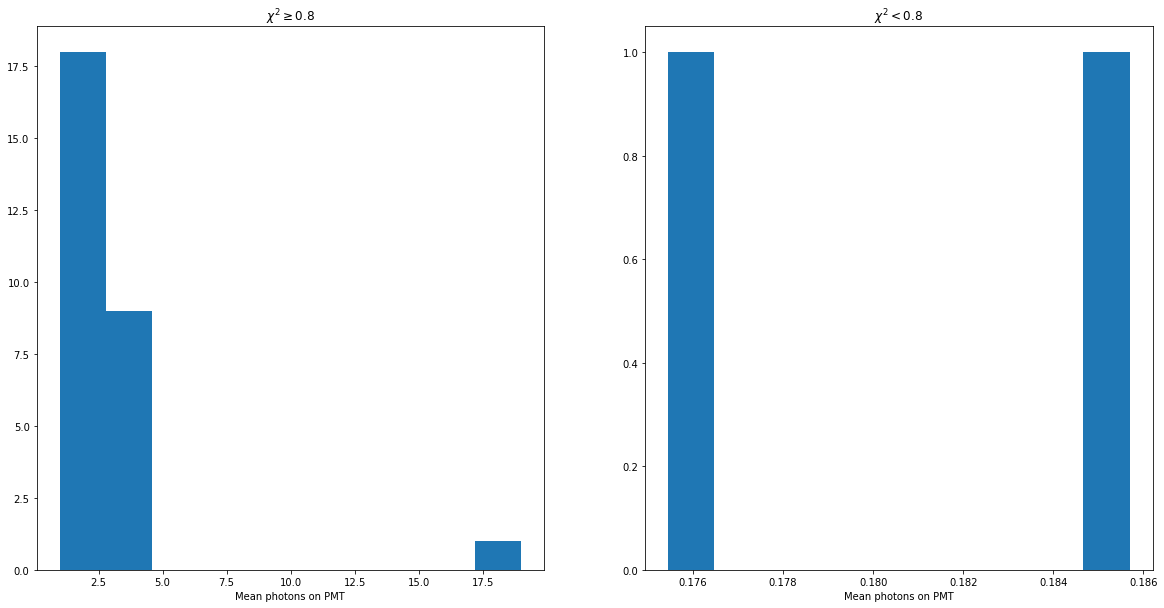

In [9]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.hist(predict[chi>=0.8])
plt.xlabel('Mean photons on PMT')
plt.title(r'$\chi^2\geq0.8$')
plt.subplot(1,2,2)
plt.hist(predict[chi<0.8])
plt.xlabel('Mean photons on PMT')
plt.title(r'$\chi^2<0.8$')
plt.show()

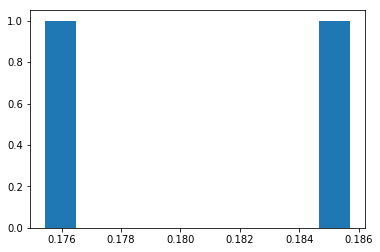

In [10]:
plt.hist(predict[chi<0.8])
plt.show()